- calculate ICC for linear and sigmoid fits (playfight study)

In [99]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
# def fix_obj_center(df_sigmoid):
#     for i,row in df_sigmoid.iterrows():
#         if np.isnan(row['obj_center']):
#             if row['bias_xmin'] >= .5:
#                 df_sigmoid.at[i, 'obj_center'] = 0
#                 # row['obj_center'] = 0
#             elif row['bias_xmax'] >= .5 :
#                 df_sigmoid.at[i, 'obj_center'] = 1
#                 # row['obj_center'] = 1
#         elif np.isinf(row['obj_center']):
#             if row['bias_xmin'] >= .5:
#                 df_sigmoid.at[i, 'obj_center'] = 0
#                 # row['obj_center'] = 0
#             elif row['bias_xmax'] >= .5 :
#                 df_sigmoid.at[i, 'obj_center'] = 1
#                 # row['obj_center'] = 1
#         elif np.abs(row['obj_center']) > 1:
#             if row['bias_xmin'] >= .5:
#                 df_sigmoid.at[i, 'obj_center'] = 0
#             elif row['bias_xmax'] >= .5 :
#                 df_sigmoid.at[i, 'obj_center'] = 1
        
#         if row['obj_center']< 0:
#             if row['bias_xmin'] >= .5:
#                 df_sigmoid.at[i, 'obj_center'] = 0
#             elif row['bias_xmax'] >= .5 :
#                 df_sigmoid.at[i, 'obj_center'] = 1
#     return df_sigmoid

# def add_new_params(df):
#     df['bias_diff'] = df['bias_xmin'] - df['bias_xmax']
#     df['amplitude'] = 1 - df['bias_xmin'] - df['bias_xmax']

#     df['mean_bias'] = .5*(df['bias_xmin'] + df['bias_xmax'])
#     df['bias_ratio'] = df['bias_xmin']/df['bias_xmax']
#     df['bias_xmin_norm'] = df['bias_xmin']/(df['bias_xmin'] + df['bias_xmax']) #df_sigmoid_subt['mean_bias']
#     df['bias_xmax_norm'] = df['bias_xmax']/(df['bias_xmin'] + df['bias_xmax']) #df_sigmoid_subt['mean_bias']

#     rows = (df['bias_xmax'] > .01) & (df['bias_xmax'] > .01)
#     # print(df.loc[rows,'bias_ratio'].shape)
#     df.loc[~rows,'bias_ratio'] = np.nan

#     df['bias_ratio_log'] = [np.log(i) for i in df.loc[:,'bias_ratio']]

#     return df

In [168]:
root_folder = '/Users/f0053cz/Documents/psyanim_v2/playfight/'

In [1]:
pwd

'/Users/f0053cz/Documents/psyanim_v2/scripts_for_beh_paper/code'

In [169]:
cols_to_keep = ['subID', 'r_squared', 'nrmse', 'center', 'obj_center', 'sigma',
        'bias_xmin', 'bias_xmax']

In [170]:
curvefit_ses1 = pd.read_csv(f'{root_folder}/10_read_data_final_task_wtraits/data/curvefits_linear_sigmoid.csv')#('../data/ses1_data/curve_fit_rmse/all_params_1k.csv')
curvefit_ses1.loc[curvefit_ses1['obj_center_linear']<0,:], curvefit_ses1.loc[curvefit_ses1['obj_center_sigmoid']<0,:]

(Empty DataFrame
 Columns: [subID, r_squared_linear, nrmse_linear, aic_linear, obj_center_linear, slope_linear, intercept_linear, bias_xmin_linear, bias_xmax_linear, flipped_linear, bias_linear, amplitude_linear, r_squared_sigmoid, nrmse_sigmoid, aic_sigmoid, center_sigmoid, obj_center_sigmoid, sigma_sigmoid, bias_xmin_sigmoid, bias_xmax_sigmoid, flipped_sigmoid, bias_sigmoid, amplitude_sigmoid, slope_sigmoid]
 Index: []
 
 [0 rows x 24 columns],
 Empty DataFrame
 Columns: [subID, r_squared_linear, nrmse_linear, aic_linear, obj_center_linear, slope_linear, intercept_linear, bias_xmin_linear, bias_xmax_linear, flipped_linear, bias_linear, amplitude_linear, r_squared_sigmoid, nrmse_sigmoid, aic_sigmoid, center_sigmoid, obj_center_sigmoid, sigma_sigmoid, bias_xmin_sigmoid, bias_xmax_sigmoid, flipped_sigmoid, bias_sigmoid, amplitude_sigmoid, slope_sigmoid]
 Index: []
 
 [0 rows x 24 columns])

In [171]:
curvefit_ses1.shape

(310, 24)

In [172]:
curvefit_ses2 =  pd.read_csv(f'{root_folder}/14_final_task_retest_batch1_sess2/data/curvefits_linear_sigmoid.csv')
curvefit_ses2.loc[curvefit_ses2['obj_center_linear']<0,:],curvefit_ses2.loc[curvefit_ses2['obj_center_sigmoid']<0,:]

(Empty DataFrame
 Columns: [subID, r_squared_linear, nrmse_linear, aic_linear, obj_center_linear, slope_linear, intercept_linear, bias_xmin_linear, bias_xmax_linear, flipped_linear, bias_linear, amplitude_linear, r_squared_sigmoid, nrmse_sigmoid, aic_sigmoid, center_sigmoid, obj_center_sigmoid, sigma_sigmoid, bias_xmin_sigmoid, bias_xmax_sigmoid, flipped_sigmoid, bias_sigmoid, amplitude_sigmoid, slope_sigmoid, aic_diff]
 Index: []
 
 [0 rows x 25 columns],
 Empty DataFrame
 Columns: [subID, r_squared_linear, nrmse_linear, aic_linear, obj_center_linear, slope_linear, intercept_linear, bias_xmin_linear, bias_xmax_linear, flipped_linear, bias_linear, amplitude_linear, r_squared_sigmoid, nrmse_sigmoid, aic_sigmoid, center_sigmoid, obj_center_sigmoid, sigma_sigmoid, bias_xmin_sigmoid, bias_xmax_sigmoid, flipped_sigmoid, bias_sigmoid, amplitude_sigmoid, slope_sigmoid, aic_diff]
 Index: []
 
 [0 rows x 25 columns])

In [173]:
all_cols_sigmoid = ['subID','obj_center_sigmoid','amplitude_sigmoid','bias_sigmoid','slope_sigmoid','bias_xmin_sigmoid','bias_xmax_sigmoid','center_sigmoid','sigma_sigmoid','nrmse_sigmoid']
all_cols_linear =  ['subID','obj_center_linear' ,'amplitude_linear' ,'bias_linear' ,'slope_linear' ,'bias_xmin_linear' ,'bias_xmax_linear', 'nrmse_linear']

all_cols = all_cols_sigmoid + all_cols_linear[1:]
all_cols

['subID',
 'obj_center_sigmoid',
 'amplitude_sigmoid',
 'bias_sigmoid',
 'slope_sigmoid',
 'bias_xmin_sigmoid',
 'bias_xmax_sigmoid',
 'center_sigmoid',
 'sigma_sigmoid',
 'nrmse_sigmoid',
 'obj_center_linear',
 'amplitude_linear',
 'bias_linear',
 'slope_linear',
 'bias_xmin_linear',
 'bias_xmax_linear',
 'nrmse_linear']

In [174]:
curvefit_ses1 = curvefit_ses1[all_cols]
curvefit_ses2 = curvefit_ses2[all_cols]

In [175]:
cmap = 'BrBG'#'RdBu_r'

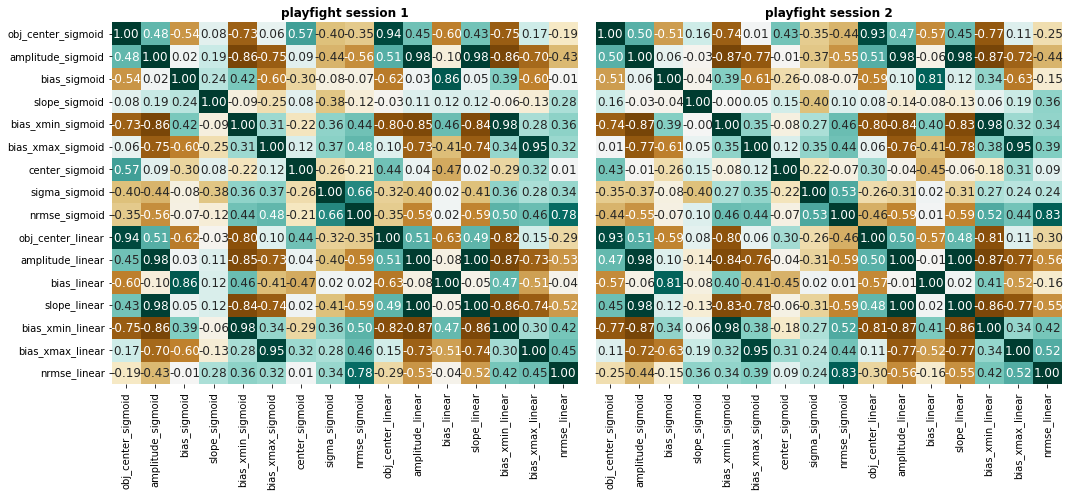

In [176]:
fig,axs = plt.subplots(nrows=1,ncols = 2, figsize=(15,7))

ax = axs[0]
sns.heatmap(curvefit_ses1.loc[:,all_cols[1:]].corr(),vmin=-1,vmax=1,annot=True,cbar=False,cmap=cmap,ax=ax,fmt = '.2f',annot_kws={"size": 12})
ax.set_title('playfight session 1',fontweight='bold')

ax = axs[1]
sns.heatmap(curvefit_ses2.loc[:,all_cols[1:]].corr(),vmin=-1,vmax=1,annot=True,cbar=False,cmap=cmap,ax=ax,fmt = '.2f',annot_kws={"size": 12})
ax.set_title('playfight session 2',fontweight='bold')
ax.set_yticks([])

plt.tight_layout()
# plt.savefig('../results/curvefit_covar_allcols_pf.png', dpi=300, bbox_inches='tight')

In [177]:
cols_main = ['subID', 'obj_center','amplitude','bias', 'slope']
cols_main_linear = [i + '_linear' if i!='subID' else i for i in cols_main]
cols_main_sigmoid = [i + '_sigmoid'  if i!='subID' else i for i in cols_main]
cols_main_sigmoid.pop()
cols_main_sigmoid.append('sigma_sigmoid')
cols_all = cols_main_sigmoid + cols_main_linear[1:]
cols_all

['subID',
 'obj_center_sigmoid',
 'amplitude_sigmoid',
 'bias_sigmoid',
 'sigma_sigmoid',
 'obj_center_linear',
 'amplitude_linear',
 'bias_linear',
 'slope_linear']

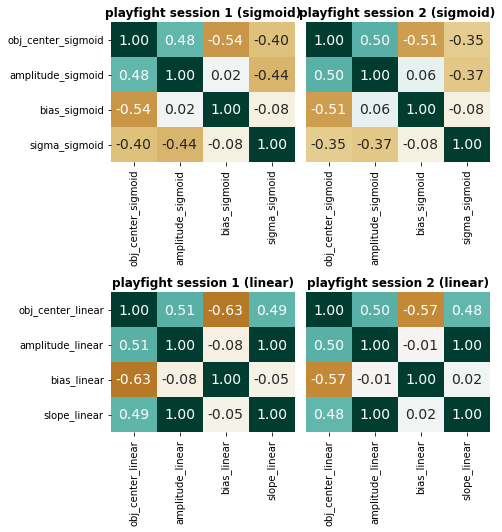

In [178]:
fig,axs = plt.subplots(nrows=2, ncols = 2, figsize=(7,7.5))

ax = axs[0,0]
sns.heatmap(curvefit_ses1.loc[:,cols_main_sigmoid[1:]].corr(),vmin=-1,vmax=1,annot=True,cbar=False,fmt = '.2f',cmap=cmap,ax=ax,annot_kws={"size": 14})
ax.set_title('playfight session 1 (sigmoid)',fontweight='bold')

ax = axs[0,1]
sns.heatmap(curvefit_ses2.loc[:,cols_main_sigmoid[1:]].corr(),vmin=-1,vmax=1,annot=True,cbar=False,fmt = '.2f',cmap=cmap,ax=ax,annot_kws={"size": 14})
ax.set_title('playfight session 2 (sigmoid)',fontweight='bold')
ax.set_yticks([])

# plt.tight_layout()
# plt.savefig('../results/curvefit_covar_onlyfinal_pf_sigmoid.png', dpi=300, bbox_inches='tight')

ax = axs[1,0]
sns.heatmap(curvefit_ses1.loc[:,cols_main_linear[1:]].corr(),vmin=-1,vmax=1,annot=True,cbar=False,fmt = '.2f',cmap=cmap,ax=ax,annot_kws={"size": 14})
ax.set_title('playfight session 1 (linear)',fontweight='bold')

ax = axs[1,1]
sns.heatmap(curvefit_ses2.loc[:,cols_main_linear[1:]].corr(),vmin=-1,vmax=1,annot=True,cbar=False,fmt = '.2f',cmap=cmap,ax=ax,annot_kws={"size": 14})
ax.set_title('playfight session 2 (linear)',fontweight='bold')
ax.set_yticks([])

plt.tight_layout()
plt.savefig('../results/curvefit_covar_onlyfinal_pf_linear_sigmoid.png', dpi=300, bbox_inches='tight')

In [179]:
meaningful_names = {'obj_center': 'objective midpoint (50%)', 'amplitude': 'amplitude', \
    'bias_xmin_norm':r'$\frac{\mathrm{bias\ against\ fight}}{\mathrm{bias\ against\ play + bias\ against\ fight}}$',\
    'bias':'bias',
    'bias_xmin': 'bias against fight', 'bias_xmax': 'bias against play', 'mean_bias': 'uncertainty', \
    # 'bias_ratio':r'$\frac{\mathrm{bias\ against\ fight}}{\mathrm{bias\ against\ play}}$',\
    # 'bias_diff': 'bias against fight\nrel. to play', \
    # 'bias_ratio_log': r'$\log(\frac{\mathrm{bias\ against\ fight}}{\mathrm{bias\ against\ play}})$',
    # 'center':'subjective midpoint', \
    'sigma':'inverse slope'
    }

In [180]:
cols_all

['subID',
 'obj_center_sigmoid',
 'amplitude_sigmoid',
 'bias_sigmoid',
 'sigma_sigmoid',
 'obj_center_linear',
 'amplitude_linear',
 'bias_linear',
 'slope_linear']

In [181]:
curvefit_ses1_main = curvefit_ses1[cols_all]
curvefit_ses2_main = curvefit_ses2[cols_all]
bothsess = curvefit_ses1_main.merge(curvefit_ses2_main,how='inner',on='subID',suffixes = ['_ses1','_ses2'])
bothsess.head()

,subID,obj_center_sigmoid_ses1,amplitude_sigmoid_ses1,bias_sigmoid_ses1,sigma_sigmoid_ses1,obj_center_linear_ses1,amplitude_linear_ses1,bias_linear_ses1,slope_linear_ses1,obj_center_sigmoid_ses2,amplitude_sigmoid_ses2,bias_sigmoid_ses2,sigma_sigmoid_ses2,obj_center_linear_ses2,amplitude_linear_ses2,bias_linear_ses2,slope_linear_ses2
0,26000.0,0.314152,0.608468,0.862670,0.156243,0.290396,0.706036,1.000000,0.709500,0.240891,0.393208,0.780575,0.097806,0.124705,0.477381,0.842809,0.477381
1,26001.0,0.583813,0.372396,0.601193,0.126279,0.405999,0.386857,0.559309,0.386857,0.598518,0.516166,0.561400,0.165944,0.495616,0.521357,0.504775,0.521357
2,26003.0,0.465610,0.945636,0.618425,0.138639,0.485000,0.985000,1.000000,1.000000,0.559179,0.880916,0.642691,0.136716,0.507960,0.984330,0.000000,0.984330
3,26004.0,0.499196,0.503219,0.548648,0.226720,0.473363,0.579214,0.536666,0.579214,0.244267,0.186718,0.588222,0.209161,0.202595,0.214714,0.581317,0.214714
4,26005.0,0.610678,0.508902,0.442289,0.149196,0.579699,0.570000,0.394352,0.570000,0.390199,0.741899,0.856189,0.150020,0.369992,0.822131,1.000000,0.870643


In [182]:
def get_p(p):
    if p < .001:
        return "p < .001"
    elif p < .01:
        return f"p={p:.3f}"
    else:
        return f"p={p:.2f}"

In [183]:
from scipy import stats

In [190]:
plt_titles = ['PSE_sigmoid', 'range_sigmoid', 'bias_sigmoid', 'sigma_sigmoid', 'PSE_linear', 'range_linear', 'bias_linear','slope_linear']

In [191]:
if 'subID' in cols_all:
    cols_all = cols_all[1:]
cols_all

['obj_center_sigmoid',
 'amplitude_sigmoid',
 'bias_sigmoid',
 'sigma_sigmoid',
 'obj_center_linear',
 'amplitude_linear',
 'bias_linear',
 'slope_linear']

# no outliers (all amp > 0)

Text(0.05, 0.75, 'r=-0.04\n(p=0.48)')

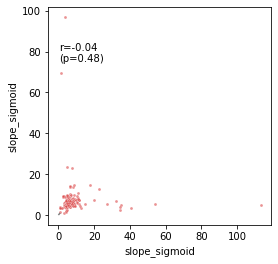

In [192]:
plt.figure(figsize=(4,4))
x = curvefit_ses1.set_index('subID')['slope_sigmoid']
y = curvefit_ses2.set_index('subID')['slope_sigmoid']
plt.plot(np.arange(0,1.1,1),np.arange(0,1.1,1), color='grey',ls='--')
sns.scatterplot(x=x, y=y, color = 'tab:red',alpha=0.5, marker = '.')
rows = ~(np.isnan(x)) & ~(np.isnan(y)) & ~(np.isinf(x)) & ~(np.isinf(y))
x = x[rows]
y = y[rows]
r_p,p_p = stats.pearsonr(x,y)
r_s,p_s = stats.spearmanr(x,y)
plt.gca().annotate(f'r={r_p:.2f}\n({get_p(p_p)})', xy = (.05,.75),xycoords='axes fraction')

Text(0.05, 0.75, 'r=0.26\n(p < .001)')

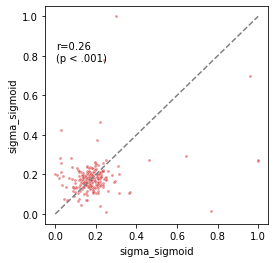

In [193]:
plt.figure(figsize=(4,4))
x = curvefit_ses1.set_index('subID')['sigma_sigmoid']
y = curvefit_ses2.set_index('subID')['sigma_sigmoid']
plt.plot(np.arange(0,1.1,1),np.arange(0,1.1,1), color='grey',ls='--')
sns.scatterplot(x=x, y=y, color = 'tab:red',alpha=0.5, marker = '.')
rows = ~(np.isnan(x)) & ~(np.isnan(y)) & ~(np.isinf(x)) & ~(np.isinf(y))
x = x[rows]
y = y[rows]
r_p,p_p = stats.pearsonr(x,y)
r_s,p_s = stats.spearmanr(x,y)
plt.gca().annotate(f'r={r_p:.2f}\n({get_p(p_p)})', xy = (.05,.75),xycoords='axes fraction')

In [194]:
cols_all

['obj_center_sigmoid',
 'amplitude_sigmoid',
 'bias_sigmoid',
 'sigma_sigmoid',
 'obj_center_linear',
 'amplitude_linear',
 'bias_linear',
 'slope_linear']

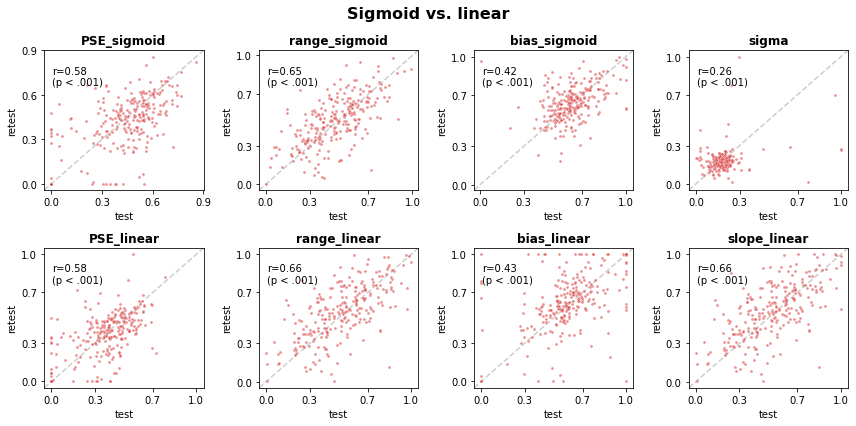

In [196]:
ncols = int(np.ceil(len(cols_all)/2))
nrows = 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3,nrows*3))  # Adjusting subplot size to make plots square
for i, item in enumerate(cols_all):
    if i > ncols-1:
        r = 1
    else:
        r = 0
    c = i%ncols

    if (r ==0) & (c==3):
        item = 'sigma_sigmoid'
        
    ax = axs[r,c] #axs[i]
    sns.scatterplot(data=bothsess, x=item + '_ses1', y=item + '_ses2', ax=ax, color = 'tab:red',alpha=0.5, marker = '.')
    # ax.set_aspect('equal')  # Ensures same scale on x and y axes
    # Adding a diagonal line from the minimum to maximum values
    limits = [min(ax.get_xlim()[0], ax.get_ylim()[0]), max(ax.get_xlim()[1], ax.get_ylim()[1])]
    ax.plot(limits, limits, 'k--', zorder=0, alpha = .2)  # 'k--' specifies a black dotted line
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    ticks = np.arange(limits[0],limits[1]*1.01,(limits[1]-limits[0])/3)
    ticks = [np.round(i,1) for i in ticks]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    x,y =  bothsess[item + '_ses1'],bothsess[item + '_ses2']
    rows = ~(np.isnan(x)) & ~(np.isnan(y)) & ~(np.isinf(x)) & ~(np.isinf(y))
    x = x[rows]
    y = y[rows]
    r_p,p_p = stats.pearsonr(x,y)
    r_s,p_s = stats.spearmanr(x,y)
    ax.annotate(f'r={r_p:.2f}\n({get_p(p_p)})', xy = (.05,.75),xycoords='axes fraction')
    # ax.set_title(meaningful_names[item], fontweight='bold') #item,fontweight='bold')
    if (r ==0) & (c==3):
        ax.set_title('sigma', fontweight='bold')
    else:
        ax.set_title(plt_titles[i], fontweight='bold') #item,fontweight='bold')
    ax.set_xlabel('test')
    ax.set_ylabel('retest')
plt.suptitle('Sigmoid vs. linear', fontweight='bold',fontsize=16)
plt.tight_layout()
plt.savefig('../results/ICC_behavior_mainterms_pf_linear_sigmoid.png',dpi=300,bbox_inches='tight')

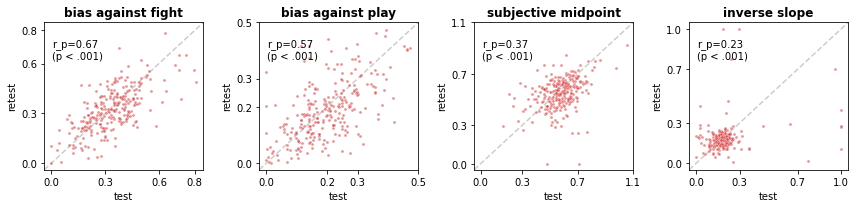

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=len(colnames_supp[1:]), figsize=(len(colnames_supp[1:])*3,3))  # Adjusting subplot size to make plots square
for i, item in enumerate(colnames_supp[1:]):
    ax = axs[i] #axs[i]
    sns.scatterplot(data=bothsess_supp_nooutliers, x=item + '_ses1', y=item + '_ses2', ax=ax, color = 'tab:red',alpha=0.5, marker = '.')
    # ax.set_aspect('equal')  # Ensures same scale on x and y axes
    # Adding a diagonal line from the minimum to maximum values
    limits = [min(ax.get_xlim()[0], ax.get_ylim()[0]), max(ax.get_xlim()[1], ax.get_ylim()[1])]
    ax.plot(limits, limits, 'k--', zorder=0, alpha = .2)  # 'k--' specifies a black dotted line
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    ticks = np.arange(limits[0],limits[1]*1.01,(limits[1]-limits[0])/3)
    ticks = [np.round(i,1) for i in ticks]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    x,y =  bothsess_supp_nooutliers[item + '_ses1'],bothsess_supp_nooutliers[item + '_ses2']
    rows = ~(np.isnan(x)) & ~(np.isnan(y)) & ~(np.isinf(x)) & ~(np.isinf(y))
    x = x[rows]
    y = y[rows]
    r_p,p_p = stats.pearsonr(x,y)
    r_s,p_s = stats.spearmanr(x,y)
    ax.annotate(f'r_p={r_p:.2f}\n({get_p(p_p)})', xy = (.05,.75),xycoords='axes fraction')
    ax.set_title(meaningful_names[item], fontweight='bold') #item,fontweight='bold')
    ax.set_xlabel('test')
    ax.set_ylabel('retest')

plt.tight_layout()
plt.savefig('../results/ICC_behavior_suppterms_pf.png',dpi=300,bbox_inches='tight')

# with outliers

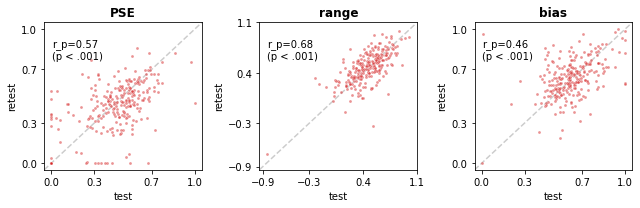

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=len(colnames_main), figsize=(len(colnames_main)*3,3))  # Adjusting subplot size to make plots square
for i, item in enumerate(colnames_main):
    ax = axs[i] #axs[i]
    sns.scatterplot(data=bothsess, x=item + '_ses1', y=item + '_ses2', ax=ax, color = 'tab:red',alpha=0.5, marker = '.')
    # ax.set_aspect('equal')  # Ensures same scale on x and y axes
    # Adding a diagonal line from the minimum to maximum values
    limits = [min(ax.get_xlim()[0], ax.get_ylim()[0]), max(ax.get_xlim()[1], ax.get_ylim()[1])]
    ax.plot(limits, limits, 'k--', zorder=0, alpha = .2)  # 'k--' specifies a black dotted line
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    ticks = np.arange(limits[0],limits[1]*1.01,(limits[1]-limits[0])/3)
    ticks = [np.round(i,1) for i in ticks]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    x,y =  bothsess[item + '_ses1'],bothsess[item + '_ses2']
    rows = ~(np.isnan(x)) & ~(np.isnan(y)) & ~(np.isinf(x)) & ~(np.isinf(y))
    x = x[rows]
    y = y[rows]
    r_p,p_p = stats.pearsonr(x,y)
    r_s,p_s = stats.spearmanr(x,y)
    ax.annotate(f'r_p={r_p:.2f}\n({get_p(p_p)})', xy = (.05,.75),xycoords='axes fraction')
    # ax.set_title(meaningful_names[item], fontweight='bold') #item,fontweight='bold')
    ax.set_title(plt_titles[i], fontweight='bold') #item,fontweight='bold')
    ax.set_xlabel('test')
    ax.set_ylabel('retest')

plt.tight_layout()
plt.savefig('../results/ICC_behavior_mainterms_pf_withoutliers.png',dpi=300,bbox_inches='tight')

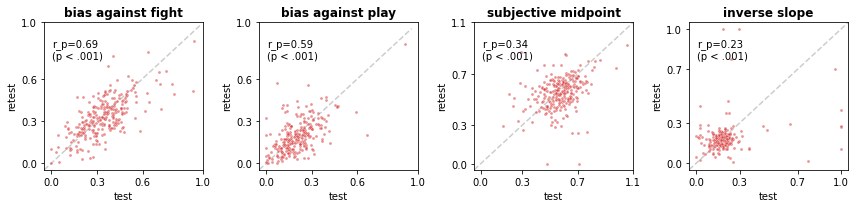

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=len(colnames_supp[1:]), figsize=(len(colnames_supp[1:])*3,3))  # Adjusting subplot size to make plots square
for i, item in enumerate(colnames_supp[1:]):
    ax = axs[i] #axs[i]
    sns.scatterplot(data=bothsess_supp, x=item + '_ses1', y=item + '_ses2', ax=ax, color = 'tab:red',alpha=0.5, marker = '.')
    # ax.set_aspect('equal')  # Ensures same scale on x and y axes
    # Adding a diagonal line from the minimum to maximum values
    limits = [min(ax.get_xlim()[0], ax.get_ylim()[0]), max(ax.get_xlim()[1], ax.get_ylim()[1])]
    ax.plot(limits, limits, 'k--', zorder=0, alpha = .2)  # 'k--' specifies a black dotted line
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    ticks = np.arange(limits[0],limits[1]*1.01,(limits[1]-limits[0])/3)
    ticks = [np.round(i,1) for i in ticks]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    x,y =  bothsess_supp[item + '_ses1'],bothsess_supp[item + '_ses2']
    rows = ~(np.isnan(x)) & ~(np.isnan(y)) & ~(np.isinf(x)) & ~(np.isinf(y))
    x = x[rows]
    y = y[rows]
    r_p,p_p = stats.pearsonr(x,y)
    r_s,p_s = stats.spearmanr(x,y)
    ax.annotate(f'r_p={r_p:.2f}\n({get_p(p_p)})', xy = (.05,.75),xycoords='axes fraction')
    ax.set_title(meaningful_names[item], fontweight='bold') #item,fontweight='bold')
    ax.set_xlabel('test')
    ax.set_ylabel('retest')

plt.tight_layout()
plt.savefig('../results/ICC_behavior_suppterms_pf_withoutliers.png',dpi=300,bbox_inches='tight')